In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read in the data
# valid as of jan 11 2021
tabs = pd.read_html('https://github.com/lixin4ever/Conference-Acceptance-Rate/blob/master/README.md')

In [44]:
dfs = []
for t0 in tabs:
    t0['confname'] = t0['Conference'].str.split("'").str[0]
    t0['year'] = t0['Conference'].str.split("'").str[1].astype(int)
    t0['acc_rate'] = t0['Long Paper'].str.split("%").str[0]
    t0['acc_rate'] = (
        t0['acc_rate'].replace('~47', '47')
        .replace('-', np.nan)
        .astype(float)
    )
    t0['submissions'] = (
        t0['Long Paper'].str.split("/")
        .str[1].str.split(')')
        .str[0].replace('1000+', '1000')
        .replace('?', np.nan)
        .replace('NaN', np.nan)
        .astype(float)
    )
    dfs.append(t0)
df = pd.concat(dfs)

df = df.dropna() # drop rows with missing vals
df = df[df['year'] <= 20] # drop year too high
df = df[df['year'] >= 14] # drop year too low

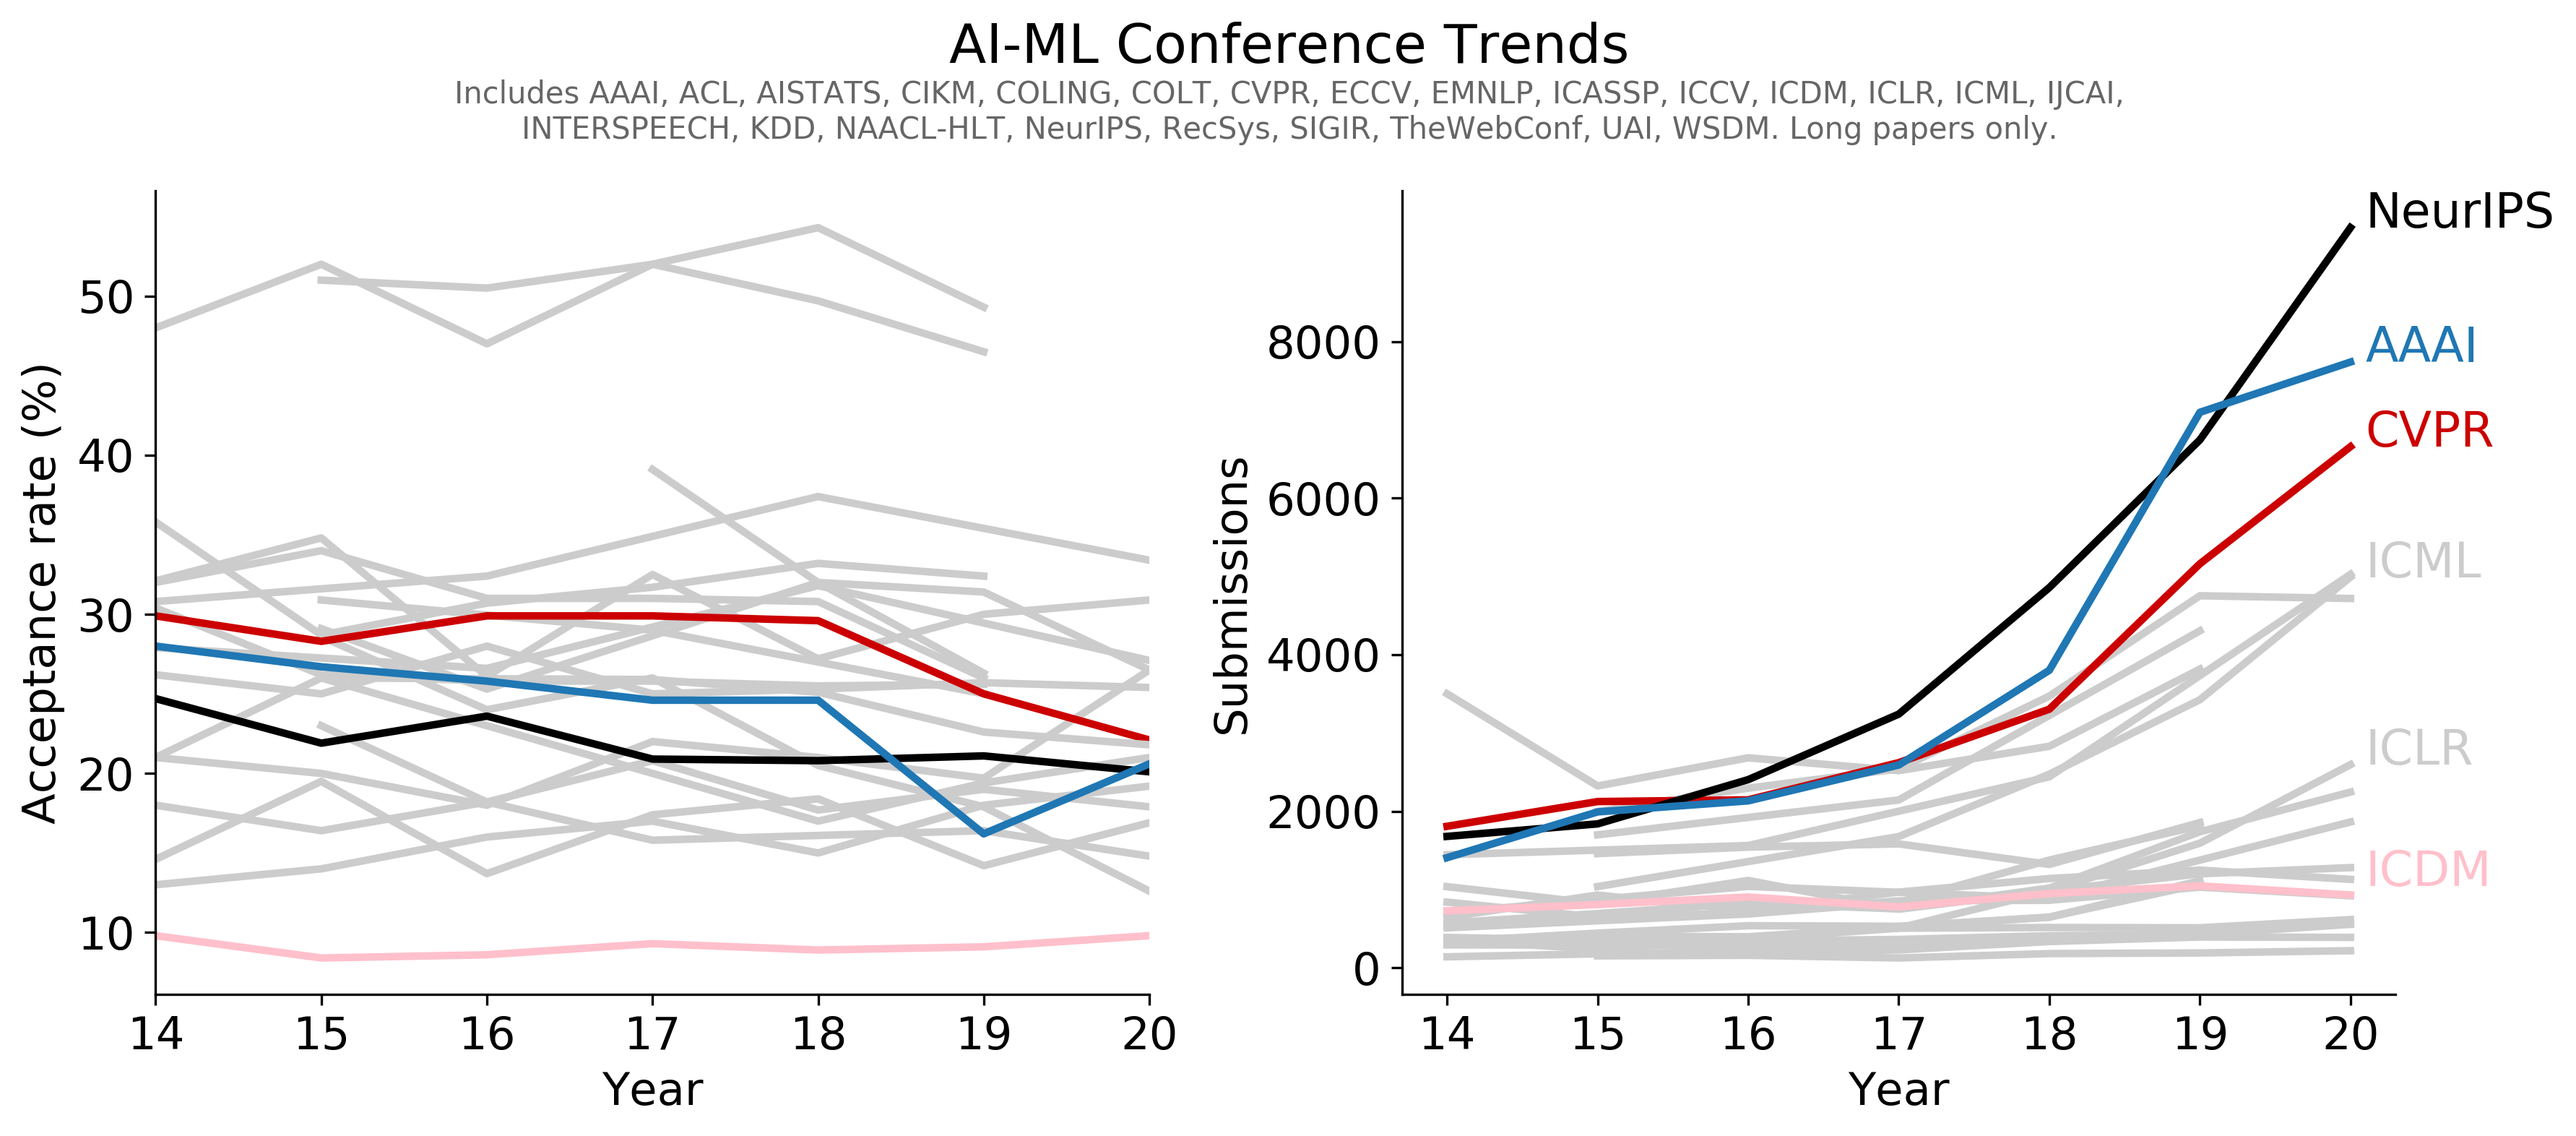

In [48]:
R, C = 1, 2
plt.figure(figsize=(12, 5), dpi=300, facecolor='w')

def get_color(confname):
    c = '#cccccc'
    if confname == 'NeurIPS':
        return 'black'
    elif confname == 'AAAI':
        return '#1f77b4'
    elif confname == 'CVPR':
        return '#cc0000'
    elif confname == 'ICDM':
        return 'pink'
#     elif confname == 'ICML':
#         return 'black'
    return c

def confname_is_special(confname):
    return confname in ['NeurIPS', 'AAAI', 'CVPR', 'ICDM', 'ICML', 'ICLR']

# acc rate plot
plt.subplot(R, C, 1)
for confname in df.confname.unique():
    conf = df[df.confname == confname]
    plt.plot(conf.year, conf.acc_rate, label=confname,
             color=get_color(confname), lw=2.5, zorder=int(confname_is_special(confname)))
plt.xlim((14, 20))
plt.xlabel('Year')
plt.ylabel('Acceptance rate (%)')    
    
# submissions plot
plt.subplot(R, C, 2)
for confname in df.confname.unique():
    conf = df[df.confname == confname]
    plt.plot(conf.year, conf.submissions, label=confname, color=get_color(confname), lw=2.5,
             zorder=int(confname_is_special(confname)))
    if confname_is_special(confname):
        plt.text(conf.year.max() + 0.1, conf.submissions.max(), confname,
                 color=get_color(confname), fontsize=16)
plt.xlabel('Year')
plt.ylabel('Submissions')

# add titles
plt.subplots_adjust(bottom=0.1, top=0.35)
plt.figtext(.5, 1,'AI-ML Conference Trends', fontsize=18, ha='center')
# ', '.join(sorted(df.confname.unique()))
plt.figtext(.5,.93,'Includes ' + 'AAAI, ACL, AISTATS, CIKM, COLING, COLT, CVPR, ECCV, EMNLP, ICASSP, ICCV, \
ICDM, ICLR, ICML, IJCAI,\nINTERSPEECH, KDD, NAACL-HLT, NeurIPS, RecSys, SIGIR, TheWebConf, UAI, WSDM. Long papers only.',
            fontsize=10,ha='center', color='#666666')
plt.show()